# Spectral Line Search

This example shows how to use dysh to search for spectral lines.
Searches can be done for a user-specified frequency range or for the frequency axis of a Spectrum.
You can use a remote query to [Splatalogue](https://splatalogue.online/) or use local tables distributed with dysh.

First we show how to do a search using a [``SpectralLineSearch``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.line.html#dysh.line.SpectralLineSearchClass) object, then using a [``Spectrum``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.spectra.html#dysh.spectra.spectrum.Spectrum) object.

## Loading Modules
We start by loading the modules we will use. 

In [1]:
# These modules are required for this example.
from dysh.line import SpectralLineSearch
from dysh.spectra import Spectrum
from astropy import units as u

## Example 1.  Doing an online or local search with SpectralLineSearch
[``SpectralLineSearch``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.line.html#dysh.line.SpectralLineSearchClass) is a thin wrapper on top of [``astroquery.splatalogue.Splatalogue``](https://astroquery.readthedocs.io/en/latest/splatalogue/splatalogue.html), with some additional conveniences for working in dysh and with GBT data.
You search a catalog in a given frequency range, optionally narrow down to specific molecules, line strengths, energies, etc.
The return object is an astropy [``Table``](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table).
Below are a few example searches.

### Do an online search for N2H+ lines between 80 and 400 GHz
Online searching of Splatalogue is the default. 
Note in this example we use an initial space in the ``chemical_name`` to eliminate other molecules that have the string ``'N2H+'`` in them. 
We set an ``intensity_lower_limit`` to weed out some of the weaker satellite lines.
When giving an ``intensity_lower_limit``, one must also provide an ``intensity_type`` string, a minimum match to ``'CDMS/JPL (log)'``, ``'Sij-mu2'``, or ``'Aij (log)'``. 

In [2]:
minfreq = 80*u.GHz
maxfreq = 400*u.GHz
table = SpectralLineSearch.query_lines(minfreq, maxfreq, 
                                       chemical_name=" N2H+", 
                                       intensity_lower_limit=-3, 
                                       intensity_type="CDMS")

In [3]:
print(f"{len(table)} rows returned.")

57 rows returned.


To inspect the available columns use the [``Table.colnames``](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table.colnames) attribute:

In [4]:
print(table.colnames)

['species_id', 'name', 'chemical_name', 'resolved_QNs', 'linelist', 'LovasASTIntensity', 'lower_state_energy', 'upper_state_energy', 'sijmu2', 'sij', 'aij', 'intintensity', 'Lovas_NRAO', 'orderedfreq', 'lower_state_energy_K', 'upper_state_energy_K', 'upperStateDegen', 'moleculeTag', 'qnCode', 'labref_Lovas_NIST', 'rel_int_HFS_Lovas', 'unres_quantum_numbers', 'lineid', 'transition_in_space', 'transition_in_G358', 'obsref_Lovas_NIST', 'source_Lovas_NIST', 'telescope_Lovas_NIST', 'searchErrorMessage']


The ``orderedfreq`` column is the rest frequency of the transition in MHz.

Some columns in the table often have embedded HTML.
That's the way they come from Splatalogue.
`¯\_(ツ)_/¯`



In [5]:
table

species_id,name,chemical_name,resolved_QNs,linelist,LovasASTIntensity,lower_state_energy,upper_state_energy,sijmu2,sij,aij,intintensity,Lovas_NRAO,orderedfreq,lower_state_energy_K,upper_state_energy_K,upperStateDegen,moleculeTag,qnCode,labref_Lovas_NIST,rel_int_HFS_Lovas,unres_quantum_numbers,lineid,transition_in_space,transition_in_G358,obsref_Lovas_NIST,source_Lovas_NIST,telescope_Lovas_NIST,searchErrorMessage
int64,str57,str11,str44,str4,str4,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str2,int64,int64,str1,str1,str18,int64,int64,int64,str6,str8,str13,str1
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,"J= 1 - 0, F<sub>1</sub>= 1- 1",JPL,0.8,0.0,3.10788,37.25038,3.222,-4.40932,-2.7844,1,93171.88,0.0,4.47152,9,-29005,102,,,J=1-0-F1=1-1,830340,1,0,Cas95,L134N,NRAO 11m,
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,J = 1 - 0,CDMS,,0.0,3.10793,104.04257,0.0,-4.44034,-2.3383,1,93173.3977,0.0,4.47165,27,29506,101,,,1 0,14632649,0,0,,,,
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,"J= 1 - 0, F<sub>1</sub>= 2- 1",JPL,0.6,0.0,3.10794,62.08887,5.371,-4.40926,-2.5625,1,93173.7,0.0,4.47161,15,-29005,102,,,J=1-0-F1=2-1,830341,1,0,Cas95,L134N,NRAO 11m,
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,"J= 1- 0,F<sub>1</sub>= 2- 1,F= 3- 2",CDMS,,0.0,3.10794,26.97166,0.0,-4.44038,-2.9246,1,93173.7699,0.0,4.47166,7,29506,103,,,1 2 3 0 1 2,14632704,0,0,,,,
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,"J= 2- 1,F<sub>1</sub>= 2- 2,F= 3- 3",CDMS,,3.1079,9.32363,8.12394,0.0,-4.05846,-2.8534,1,186342.9249,4.4716,13.41471,7,29506,103,,,2 2 3 1 2 3,14632714,0,0,,,,
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,"J= 2- 1,F<sub>1</sub>= 1- 0,F= 1- 1",CDMS,,3.108,9.32374,7.46735,0.0,-3.72708,-2.89,1,186343.0616,4.47175,13.41486,3,29506,103,,,2 1 1 1 0 1,14632716,0,0,,,,
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,"J= 2- 1,F<sub>1</sub>= 1- 0,F= 2- 1",CDMS,,3.108,9.32374,12.86961,0.0,-3.71253,-2.6536,1,186343.2691,4.47175,13.41487,5,29506,103,,,2 1 2 1 0 1,14632718,0,0,,,,
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,"J= 2- 1,F<sub>1</sub>= 2- 1,F= 2- 1",CDMS,,3.1079,9.32368,13.81529,0.0,-3.68173,-2.6228,1,186344.3941,4.4716,13.41478,5,29506,103,,,2 2 2 1 1 1,14632721,0,0,,,,
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,J = 2 - 1,CDMS,,3.1079,9.32369,208.09363,0.0,-3.45807,-1.4449,1,186344.6844,4.4716,13.4148,45,29506,101,,,2 1,14632650,0,0,,,,


### Do a local search for methyl formate.
This uses a GBT-specific catalog distributed with dysh.
You can also provide your own catalog in an astropy [``Table``](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table) format.
The first time you use a given catalog, there will be some additional overhead to read it in and cache it.
Subsequent searches will be faster because they use the cached version.
Note the default regular expression matching is case-insensitive. 
The ``gbtlines`` catalog has most lines from 300 MHz to 120 GHz, and commonly observed redshifted lines from 120 GHz to 5 THz.

In [6]:
minfreq = 400*u.MHz
maxfreq = 5550*u.MHz
table = SpectralLineSearch.query_lines(minfreq, maxfreq,
                                       cat='gbtlines', 
                                       chemical_name="methyl formate")

In [7]:
print(f"{len(table)} rows returned.")

48 rows returned.


In [8]:
table

species_id,name,chemical_name,resolved_QNs,linelist,LovasASTIntensity,lower_state_energy,upper_state_energy,sijmu2,sij,aij,intintensity,Lovas_NRAO,orderedfreq,lower_state_energy_K,upper_state_energy_K,upperStateDegen,moleculeTag,qnCode,labref_Lovas_NIST,rel_int_HFS_Lovas,unres_quantum_numbers,lineid,transition_in_space,transition_in_G358,obsref_Lovas_NIST,source_Lovas_NIST,telescope_Lovas_NIST,searchErrorMessage
int64,str47,str14,str44,str6,bytes1,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str3,int64,int64,str5,bytes1,str20,int64,int64,int64,bytes1,bytes1,bytes1,bytes1
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"1(1, 0) - 1(1, 1), v<sub>t</sub> = 0 - 0, A",ToyaMA,--,0.9,0.95371,0.0,0.0,0.0,0.03537,0,1610.249,1.29491,1.37219,--,0,0,Brown,--,--,10692427,0,0,--,--,--,--
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"1(1, 0) - 1(1, 1), v<sub>t</sub> = 0 - 0, E",ToyaMA,--,0.9,0.95373,0.0,0.0,0.0,0.03537,0,1610.906,1.29491,1.37222,--,0,0,Brown,--,--,10692428,0,0,--,--,--,--
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"27( 8,19)-27( 8,20) A",JPL,--,185.6381,185.70448,10.70843,0.0,-10.74808,--,1,1990.0988,267.09028,267.18579,110,60003,1404,--,--,27 819 0 27 820 0,11416364,0,0,--,--,--,--
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"11( 4, 7)-11( 4, 8) A",JPL,--,34.5439,34.61039,6.89492,0.0,-10.55855,--,1,1993.2922,49.70068,49.79634,46,60003,1404,--,--,11 4 7 0 11 4 8 0,11416365,0,0,--,--,--,--
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"4( 2, 2)- 4( 2, 3) A",JPL,--,5.9236,5.99132,4.62746,0.0,-10.30044,--,1,2030.0631,8.52269,8.62012,18,60003,1404,--,--,4 2 2 0 4 2 3 0,11416366,0,0,--,--,--,--
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"23( 7,16)-23( 7,17) A",JPL,--,136.5469,136.61859,9.7273,0.0,-10.62136,--,1,2149.165,196.4594,196.56254,94,60003,1404,--,--,23 716 0 23 717 0,11416367,0,0,--,--,--,--
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"15( 5,10)-15( 5,11) A",JPL,--,60.9946,61.06816,7.80019,0.0,-10.50287,--,1,2205.377,87.75712,87.86296,62,60003,1404,--,--,15 510 0 15 511 0,11416368,0,0,--,--,--,--
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"19( 6,13)-19( 6,14) A",JPL,--,94.997,95.0716,8.75245,0.0,-10.53441,--,1,2236.3094,136.67871,136.78603,78,60003,1404,--,--,19 613 0 19 614 0,11416369,0,0,--,--,--,--
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"36(10,26)-36(10,27) A",JPL,--,321.4598,321.54727,12.03857,0.0,-10.46084,--,1,2622.1518,462.50629,462.63213,146,60003,1404,--,--,361026 0 361027 0,11416370,0,0,--,--,--,--


### Search for Recombination Lines
dysh has special methods to search for recombination lines of Hydrogen, Helium, and Carbon. 
[``SpectralLineSearch.recomb``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.line.html#dysh.line.SpectralLineSearchClass.recomb) will search for a specific atom/transition, while [``SpectralLineSearch.recomball``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.line.html#dysh.line.SpectralLineSearchClass.recomball) will search for all three species. 

In [9]:
minfreq = 300*u.MHz
maxfreq = 2.0*u.GHz
table = SpectralLineSearch.recomb(minfreq, maxfreq,
                                  cat='gbtrecomb',
                                  line="Hebeta")

In [10]:
table

species_id,name,chemical_name,resolved_QNs,linelist,LovasASTIntensity,lower_state_energy,upper_state_energy,sijmu2,sij,aij,intintensity,Lovas_NRAO,orderedfreq,lower_state_energy_K,upper_state_energy_K,upperStateDegen,moleculeTag,qnCode,labref_Lovas_NIST,rel_int_HFS_Lovas,unres_quantum_numbers,lineid,transition_in_space,transition_in_G358,obsref_Lovas_NIST,source_Lovas_NIST,telescope_Lovas_NIST,searchErrorMessage
int64,str8,str25,str17,str6,bytes1,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,bytes1,int64,int64,bytes1,bytes1,str13,int64,int64,int64,bytes1,bytes1,bytes1,bytes1
1161,He&beta;,Helium Recombination Line,He ( 351 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,301.685543664761,0.0,0.0,--,0,0,--,--,He(351)&beta;,3956582,0,0,--,--,--,--
1161,He&beta;,Helium Recombination Line,He ( 350 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,304.271433765971,0.0,0.0,--,0,0,--,--,He(350)&beta;,3956581,0,0,--,--,--,--
1161,He&beta;,Helium Recombination Line,He ( 349 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,306.886961777696,0.0,0.0,--,0,0,--,--,He(349)&beta;,3956580,0,0,--,--,--,--
1161,He&beta;,Helium Recombination Line,He ( 348 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,309.532553535472,0.0,0.0,--,0,0,--,--,He(348)&beta;,3956579,0,0,--,--,--,--
1161,He&beta;,Helium Recombination Line,He ( 347 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,312.20864223806103,0.0,0.0,--,0,0,--,--,He(347)&beta;,3956578,0,0,--,--,--,--
1161,He&beta;,Helium Recombination Line,He ( 346 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,314.915668596411,0.0,0.0,--,0,0,--,--,He(346)&beta;,3956577,0,0,--,--,--,--
1161,He&beta;,Helium Recombination Line,He ( 345 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,317.654080986085,0.0,0.0,--,0,0,--,--,He(345)&beta;,3956576,0,0,--,--,--,--
1161,He&beta;,Helium Recombination Line,He ( 344 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,320.42433560322803,0.0,0.0,--,0,0,--,--,He(344)&beta;,3956575,0,0,--,--,--,--
1161,He&beta;,Helium Recombination Line,He ( 343 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,323.226896624166,0.0,0.0,--,0,0,--,--,He(343)&beta;,3956574,0,0,--,--,--,--


Search all recombination lines.
As with any astropy [``Table``](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table), you can limit the displayed columns with a list.

In [11]:
table = SpectralLineSearch.recomball(minfreq, maxfreq,
                                     cat='gbtrecomb')
table[['name', 'chemical_name', 'orderedfreq']]

name,chemical_name,orderedfreq
str10,str27,float64
H&epsilon;,Hydrogen Recombination Line,300.134854181299
H&gamma;,Hydrogen Recombination Line,300.310962014245
He&gamma;,Helium Recombination Line,300.43333977202605
C&gamma;,Carbon Recombination Line,300.460803205189
H&delta;,Hydrogen Recombination Line,300.536517272198
He&delta;,Helium Recombination Line,300.65898694452807
H&alpha;,Hydrogen Recombination Line,301.179832211236
He&alpha;,Helium Recombination Line,301.30256403663304
C&alpha;,Carbon Recombination Line,301.33010692796296


## Example 2. Search within the frequency range of a Spectrum
The [``Spectrum.query_lines``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.spectra.html#dysh.spectra.spectrum.Spectrum.query_lines). [``Spectrum.recomb``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.spectra.html#dysh.spectra.spectrum.Spectrum.recomb), and [``Spectrum.recomball``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.spectra.html#dysh.spectra.spectrum.Spectrum.recomball) methods of [``Spectrum``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.spectra.html#dysh.spectra.spectrum.Spectrum) will use the minimum and maximum frequencies of the spectral axis.
Other keywords are the same as in [``SpectralLineSearch``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.line.html#dysh.line.SpectralLineSearchClass).

For this example we construct a fake spectrum, with 16384 channels that are 1 kHz wide and a rest frequency of 1.4240575 GHz.

In [12]:
cdelt1 = float((1000*u.Hz).value)
nchan = 16384
restfreq = float((1.4240575*u.GHz).to(u.Hz).value)
crval1 = restfreq
s = Spectrum.fake_spectrum(nchan=nchan, 
                           crval1=crval1, 
                           restfrq=restfreq, 
                           freqres=cdelt1, 
                           cdelt1=cdelt1, 
                           obsfreq=restfreq, 
                           dopfreq=restfreq, 
                           object='MyFakeSrc')

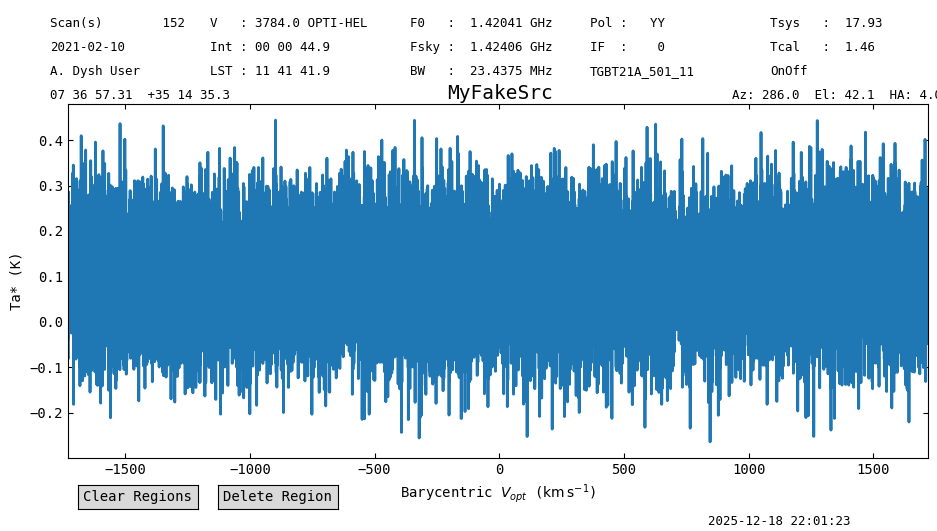

In [13]:
s.plot(vel_frame='icrs', xaxis_unit='km/s')

Find the hydrogen recombination lines that could be in this spectrum, and display their name, chemical name and frequency (in MHz).

In [14]:
s.recomb(line='hydrogen', cat='gbtrecomb')[['name', 'chemical_name', 'orderedfreq']]

name,chemical_name,orderedfreq
str10,str27,float64
H&gamma;,Hydrogen Recombination Line,1418.3334505418002
H&zeta;,Hydrogen Recombination Line,1418.65587364335
H&beta;,Hydrogen Recombination Line,1420.2354594106603
H&alpha;,Hydrogen Recombination Line,1424.73358996475
H&epsilon;,Hydrogen Recombination Line,1428.10062420283
H&delta;,Hydrogen Recombination Line,1429.77140255287


Find all lines in the spectrum's frequency range.

In [15]:
s.query_lines(cat='gbtlines')[['name', 'chemical_name', 'orderedfreq']].pprint_all()

                                  name                                    chemical_name     orderedfreq  
------------------------------------------------------------------------ ---------------- ---------------
                                                                  H-atom  Atomic Hydrogen 1420.4057517667
                                                               NaCN/NaNC   Sodium Cyanide       1430.0591
                                                                    17OH Hydroxyl radical       1418.1976
                                                                    17OD Hydroxyl radical       1419.1013
                                                                    17OD Hydroxyl radical       1419.5477
                                                                    17OD Hydroxyl radical        1420.094
                                                                   HDCCO           Ketene       1417.2492
                                              

To clear the cache, use:

In [16]:
SpectralLineSearch.clear_cache()